In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
from itertools import combinations
import itertools

### Ackley function

In [2]:
def ackley(x):
    d = len(x)
    sum_sq = np.sum(x**2)
    sum_cos = np.sum(np.cos(2*np.pi*x))
    return -20*np.exp(-0.2*np.sqrt(sum_sq/d)) - np.exp(sum_cos/d) + 20 + np.exp(1)

l_bound = -5
u_bound = 5
x = np.random.uniform(low=l_bound, high=u_bound, size=5)
print(ackley(x))


11.601912858824367


**a)** Using Monte Carlo search (MCS), how do the results improve when the number of function evaluations is increased from 1’000 to 2’000, 4’000, 8’000, and 16’000?
When using MCS to optimize the Ackley function, increasing the number of function evaluations will generally improve the quality of the solution found. This is because
increasing the number of evaluations provides more opportunities for the algorithm to explore the search space and discover better solutions.<br>
So, when the number of function evaluations is increased the accurate of the model is improving.


1000 evaluations: 4.645286
2000 evaluations: 4.729348
4000 evaluations: 2.632915
8000 evaluations: 3.210046
16000 evaluations: 2.698460


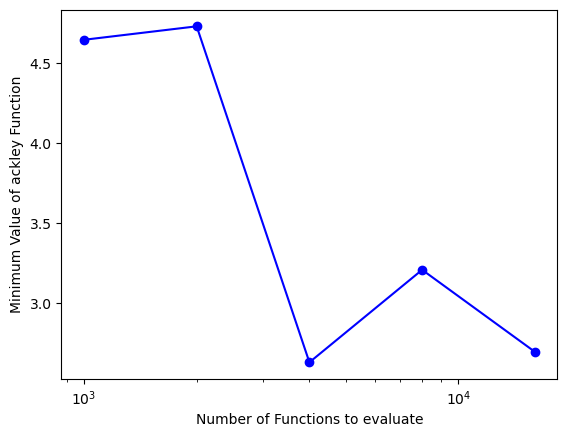

In [3]:
def mcs(n_evals, n_dims):
    best_solution = None
    min_val = np.inf
    for i in range(n_evals):
        x = np.random.uniform(-5, 5, n_dims)
        val = ackley(x)
        if val < min_val:
            min_val = val
            best_solution = x
    return min_val

evals_list = [1000, 2000, 4000, 8000, 16000]
dims = 5
min_vals = []
for n_evals in evals_list:
    min_val = mcs(n_evals, dims)
    min_vals.append(min_val)
    print(f"{n_evals} evaluations: {min_val:.6f}")
    
#print (results)
plt.plot(evals_list, min_vals, 'bo-')
plt.xscale('log')
#plt.xticks(evals_list)
plt.xlabel('Number of Functions to evaluate')
plt.ylabel('Minimum Value of ackley Function')
plt.show()


Now to understand better I plot Evals_list that takes values which differ by factors of 2,
[1000, 2000, 4000, 8000, 16000], that is why the log scale. Now, a logartimic scale with
mcs function changes as the number of functions increases over several orders of
magnitudes, it help us to see if the algorithm converges to a satble minimum value or if it
continues as the number of funciton evaluations increases.

**b)**  Using Differential Evolution (DE) with function evaluations as above and “typical” settings
for the remaining hyperparameters (popSize=15, pXO=0.5, F=0.7), how to the reported
results compare to those from MCS?

In [5]:
bounds = [(-5, 5)] * 5
for i in evals_list:
    result = differential_evolution(ackley, bounds, popsize=15, mutation=0.7, recombination=0.5, maxiter=i, tol=1e-7)
    print(f"Result for maxIter={i}evaluations: {result.fun:}")


Result for maxIter=1000evaluations: 4.440892098500626e-16
Result for maxIter=2000evaluations: 4.440892098500626e-16
Result for maxIter=4000evaluations: 4.440892098500626e-16
Result for maxIter=8000evaluations: 4.440892098500626e-16
Result for maxIter=16000evaluations: 4.440892098500626e-16


To compare the results from DE to those from MCS, we can run both algorithms with the same number of function evaluations (e.g. 1000) and compare the best fitness values obtained. In general, DE is expected to perform better than MCS for high-dimensional problems like the Ackley function, as it uses a population-based approach that can better explore the search space. However, the performance of DE can be sensitive to the choice of hyperparameters, so it may require some tuning to achieve good results.

In [6]:
def compare_mcs_vs_de(evals_list,n_dims):
    for i in evals_list:
        mcs_result = mcs(i,n_dims)
        de_result = differential_evolution(ackley, [(-5, 5)]*5, popsize=15, mutation=0.7, recombination=0.5, maxiter=i//15, tol=1e-7).fun
        print(f"MCS result with {i} evaluations:{mcs_result}")
        print(f"DE result with {i} evlauations:{de_result}")

compare_mcs_vs_de(evals_list,dims)


MCS result with 1000 evaluations:4.41306056739208
DE result with 1000 evlauations:1.9891399194449377e-08
MCS result with 2000 evaluations:3.880375602205025
DE result with 2000 evlauations:4.6397063968584007e-10
MCS result with 4000 evaluations:3.9529906705919022
DE result with 4000 evlauations:4.440892098500626e-16
MCS result with 8000 evaluations:3.1243219675167926
DE result with 8000 evlauations:4.440892098500626e-16
MCS result with 16000 evaluations:2.6049888316812866
DE result with 16000 evlauations:4.440892098500626e-16


The results of MCS and DE means the best fitness values for the minimum value of
the Ackley function found by each algorithm after 1’000, 2’000, 4’000, 8’000, and
16’000 function evaluations.
In this case, the best solution with MCS for 1000 evaluations result of
4.517440589899316, this value represents the lowest value of the Ackley function
found by MCS, and it may or may not be the global minimum of the function. Now,
comparing with the DE for 1000 evaluations as well the result is
1.9989670807518678e-08, so we can note that this value is much smaller than the
MCS result, and it suggests that DE was able to find a much better minimum or in
lower time for the Ackley function. However, it's important to note that the
performance of DE can be sensitive to the choice of hyperparameters, so it's
possible that better results could be obtained with different settings.These results
suggest that DE is a more effective optimization algorithm for the Ackley function
than MCS.

**c)** For DE with 2’000 function evaluations, 𝐹 = 0.7, and a population size of 5, 10, 15, and
20, respectively: how does the cross-over probability affect the (typical) reported results?


The cross-over probability (pXO) in Differential Evolution (DE) determines the probability of recombining the parameters of two candidate solutions during the mutation operation.  
A higher pXO value means a higher probability of recombination, which can potentially help to explore the search space more effectively.  
However, a too high pXO value can also lead to premature convergence and a loss of diversity in the population.

To investigate the effect of pXO on the performance of DE, we can compare the results of DE with different population sizes (5, 10, 15, and 20) and a fixed number of function evaluations (2000) for different values of pXO (e.g., 0.1, 0.3, 0.5, 0.7, and 0.9).

In [9]:
pop_size=[5,10,15,20]
num_evaluations=2000
cross_OP = [0.1, 0.3, 0.5, 0.7, 0.9]
def compare_DE_cross_OP(pop_size, num_evaluations, cross_OP):
    result = differential_evolution(ackley, [(-5, 5)]*5, popsize=pop_size, mutation=0.7, recombination=cross_OP, maxiter=num_evaluations//pop_size, tol=1e-7).fun
    return result


def compare_pXO_effect(pop_sizes, num_evaluations,cross_OP):
    for i in pop_sizes:
        print(f"Population size: {i}")
        for j in cross_OP:
            result = compare_DE_cross_OP(i, num_evaluations, j)
            print(f"pXO: {j}, result: {result}")


The results of the code compare_pXO_effect(pop_size, num_evaluations,cross_OP) are:


In [8]:
compare_pXO_effect(pop_size, num_evaluations,cross_OP)

Population size: 5
pXO: 0.1, result: 3.9968028886505635e-15
pXO: 0.3, result: 3.9968028886505635e-15
pXO: 0.5, result: 4.440892098500626e-16
pXO: 0.7, result: 3.9968028886505635e-15
pXO: 0.9, result: 4.440892098500626e-16
Population size: 10
pXO: 0.1, result: 1.0903677960527602e-10
pXO: 0.3, result: 2.1747048606357566e-12
pXO: 0.5, result: 1.1102230246251565e-14
pXO: 0.7, result: 4.440892098500626e-16
pXO: 0.9, result: 7.549516567451064e-15
Population size: 15
pXO: 0.1, result: 2.3119071856925189e-07
pXO: 0.3, result: 1.5274274733911852e-08
pXO: 0.5, result: 1.2139911298447714e-09
pXO: 0.7, result: 4.404698827897846e-11
pXO: 0.9, result: 4.765077221691172e-13
Population size: 20
pXO: 0.1, result: 1.6424355653299472e-08
pXO: 0.3, result: 2.006525123832148e-08
pXO: 0.5, result: 5.257931410262984e-07
pXO: 0.7, result: 1.5576379741588653e-08
pXO: 0.9, result: 2.615664573824006e-09


Meanwhile the result is smaller, the algorithm’s performance is better. The results
highlighted in yellow show whit which size of population and cross-over probability the
performance of the Differential Evolution algorithm is better. So, for this Ackley function,
smaller probabilities and larger population sizes tend to produce better results. In general
larger population sizes may lead to better results because it increases the diversity of the
population and helps to prevent the algorithm from getting stuck in local optima. But as I
mentioned earlier high crossover probability may cause the algorithm to converge too
quickly.


### PROBLEM 2

**a)** Assume the items are not divisible and selection problem is binary, i.e., an item can be
included or not, 𝑥𝑖 ∈ {0, 1}. What is the optimal combination for 𝑁 = 10? And for 𝑁 = 20?


In [2]:
def knapsack_binary(N):
    weight = np.arange(1,N+1)*(np.sqrt(2)) % 2
    values = np.arange(1,N+1)*(np.pi) % 3
    budget = N*0.3
    all_comb = list(itertools.product([0, 1], repeat=N))
    t_value = []
    t_weight = []
    for c in all_comb:
        t_value.append(sum(values[i] for i in range(N) if c[i]))
        t_weight.append(sum(weight[i] for i in range(N) if c[i]))
    
    # Find the combination that maximizes value and respects the weight constraint
    max_value = max((v for v, w in zip(t_value, t_weight) if w <= budget))
    op_comb = all_comb[t_value.index(max_value)]
    
    return op_comb

In [8]:
op_comb_10 = knapsack_binary(10)
op_comb_20 = knapsack_binary(20)
print("Op. combination for N=10:", op_comb_10)
print("Op. combination for N=20:", op_comb_20)

Op. combination for N=10: (0, 0, 0, 0, 1, 1, 1, 1, 0, 1)
Op. combination for N=20: (0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1)


A binary tuple of length N is produced as the function's output, and each element
represents whether a given item is either included (1) or excluded (0) in the best possible
outcome. The best combination of things with N=10 elements is (0, 0, 0, 0, 1, 1, 1, 1, 0, 1), meaning that items 5, 6, 7, 8, and 10 are packed in the knapsack_binary, but items 1, 2, 3, 4, and 9 are not. For N=20, which is (0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1) Items 9, 10, 11, 12, 13, 14, 16, 17, 18, and 20 are included in the best combination of items. The function produces N items with corresponding weights and values from a number N as input. The combination with the highest value that complies with the weight requirement is then returned after generating all possible combinations of elements, computing the total value and weight for each combination.


**b)**  Assume items are divisible and 𝑥𝑖 can be real-valued, yet within limits 0 ≤ 𝑥𝑖 ≤ 1. What are now the optimal solutions for 𝑁 = 10 and 𝑁 = 20?


In [9]:
def knapsack_fractional(N):
    weight = np.arange(1,N+1)*(np.sqrt(2)) % 2
    values = np.arange(1,N+1)*(np.pi) % 3
    budget = N*0.3
    value_per_weight = values / weight  #value per weight
    sorted_items = sorted(zip(value_per_weight, weight, values), reverse=True)
    t_value = 0
    t_weight = 0
    for vpw, w, v in sorted_items:
        if t_weight + w <= budget:
            # Take the entire item if it fits within the budget
            t_value += v
            t_weight += w
        else:
            # Take a fraction of the item that fits within the budget
            fraction = (budget - t_weight) / w
            t_value += v * fraction
            t_weight += w * fraction
            break
    
    return t_value, t_weight


In this implementation, the items are sorted by value per unit weight in descending order, and then added to the knapsack in that order until the knapsack is full. If an item cannot be added in its entirety, a fraction of the item is added instead.

In [10]:

optimal_value, optimal_weight = knapsack_fractional(10)
print(f"For 10, the optimal solution is: value={optimal_value:.2f}, weight={optimal_weight:.2f}")

optimal_value, optimal_weight = knapsack_fractional(20)
print(f"For 20, the optimal solution is: value={optimal_value:.2f}, weight={optimal_weight:.2f}")



For 10, the optimal solution is: value=5.16, weight=3.00
For 20, the optimal solution is: value=19.84, weight=6.00


The goal is to maximize the total value of the items selected while not exceeding the budget.The budget is set at N*0.3, hence the maximum combined weight of the chosen
items cannot be greater than N*0.3.<br>
Following that, the function determines the value per weight for each item and arranges them in decreasing weight. Once the money is spent, it continues to choose goods in decreasing value per weight order. In cases where an item's cost prevents full selection, a portion of the item is chosen based on the amount of budget that is still available.<br>
The function returns the combined weight and value of the chosen items.<br>
The program executes the knapsack_fractional function for two different values of N (10 and 20) and outputs the best result for each case.